/tmp/ipykernel_28796/4217897862.py:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


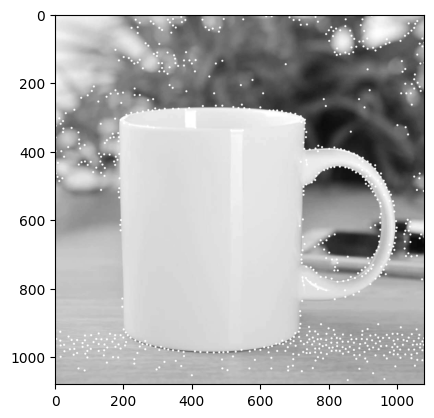

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_interest_points(image, max_corners=1000, quality_level=0.01, min_distance=10):
    """
    Detect interest points using the Harris corner detector.
    
    Args:
    - image (np.array): Grayscale image in which to detect interest points.
    - max_corners (int): Maximum number of corners to return.
    - quality_level (float): Minimum accepted quality of image corners.
    - min_distance (int): Minimum possible Euclidean distance between the returned corners.
    
    Returns:
    - corners (np.array): Array of detected corners.
    """
    # Detect corners using the goodFeaturesToTrack function
    corners = cv2.goodFeaturesToTrack(image, max_corners, quality_level, min_distance)
    corners = np.int0(corners)
    
    return corners

# Load and preprocess the image
image = cv2.imread('./pic/pic_1.jpg', cv2.IMREAD_GRAYSCALE)
corners = detect_interest_points(image)

# Visualize the detected interest points
for i in corners:
    x, y = i.ravel()
    cv2.circle(image, (x, y), 3, 255, -1)

plt.imshow(image, cmap='gray')
plt.show()

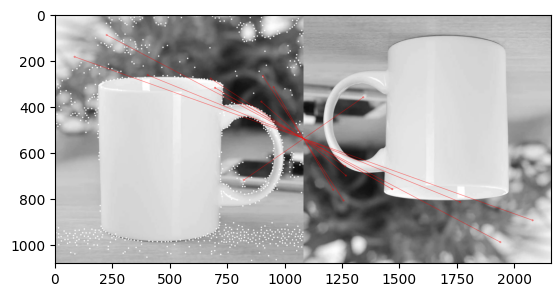

In [7]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for the first image
keypoints_1, descriptors_1 = sift.detectAndCompute(image, None)

# Load and preprocess the second image
image_2 = cv2.imread('./pic/pic_2.jpg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and compute descriptors for the second image
keypoints_2, descriptors_2 = sift.detectAndCompute(image_2, None)

# Initialize the BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors_1, descriptors_2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top 10 matches
image_matches = cv2.drawMatches(
    image, keypoints_1, image_2, keypoints_2, matches[:10], None,
    matchColor=(255, 0, 0),  # 红色
    singlePointColor=(0, 255, 0),  # 绿色
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the matches
plt.imshow(image_matches)
plt.show()